# Linear Regression

## Import necessary libraries and dataframes 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import StatsFunctions as sf

In [2]:
#importing cvs files and saving them under a variable
kc_house_df = pd.read_csv("kc_df_cleaned.csv")
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
1,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
2,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
3,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
4,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


In [3]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17925 non-null  float64
 1   bedrooms     17925 non-null  int64  
 2   sqft_living  17925 non-null  int64  
 3   sqft_lot     17925 non-null  int64  
 4   floors       17925 non-null  float64
 5   condition    17925 non-null  int64  
 6   grade        17925 non-null  int64  
 7   zipcode      17925 non-null  int64  
 8   lat          17925 non-null  float64
 9   long         17925 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.4 MB


In [4]:
df_cont_log = pd.read_csv("df_cont_log_cleaned.csv")
df_cont_log.head()

,price_log,sqft_living_log
0,0.380995,0.823169
1,-1.927823,-2.213002
2,0.625004,0.140596
3,0.268290,-0.247722
4,-1.172776,-0.195780


***
## One-Hot Encoding categorcial features

I will use one-hot encoding to transfrom categorical columns into binary variables 

In [5]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
1,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
2,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
3,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
4,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


In [6]:
categoricals = ['bedrooms', 'floors', 'condition', 'grade']

cat_series = kc_house_df[categoricals]
df_cat = cat_series.astype('category')

In [7]:
df_cat.dtypes

bedrooms     category
floors       category
condition    category
grade        category
dtype: object

In [8]:
df_cat_ohe = pd.get_dummies(df_cat, prefix=categoricals, drop_first = True)

***
## Now, we combine the categorical and continous features

In [9]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([df_cont_log, df_cat_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,floors_3.0,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,0.380995,0.823169,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-1.927823,-2.213002,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.625004,0.140596,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0.268290,-0.247722,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-1.172776,-0.195780,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


***
## Check for linearity

I will create a plot of continuous variables using Seaborn to determine if the target variable ('price_log') is linearly related to the input features

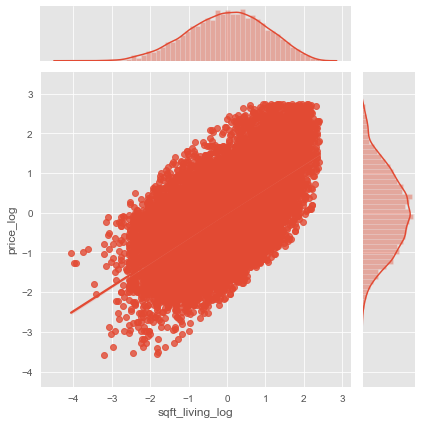

In [10]:
sns.jointplot('sqft_living_log', 'price_log', data=preprocessed, kind='reg')

Kinda hard to see but there is a linear relationship between the two.

***
## Fitting an initial model

In [11]:
features = list(preprocessed.drop('price_log', axis=1))

In [12]:
print(features)

['sqft_living_log', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']


In [13]:
model = sf.check_model(df=preprocessed, features_to_use=features, target_col='price_log', show_summary=True)

sqft_living_log surpassed threshold with vif=3.025113734712017
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              1022.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        16:48:30   Log-Likelihood:                         -18850.
No. Observations:               17925   AIC:                                  3.774e+04
Df Residuals:                   17906   BIC:                                  3.789e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  

Model shows that 'sqft_living_log' column surpasses vif threshold so I will remove it. This hopefully will help with mulitcollinearity as well.

In [14]:
features.remove('sqft_living_log')

In [15]:
print(features)

['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']


In [16]:
model = sf.check_model(df=preprocessed, features_to_use=features, target_col='price_log', show_summary=True)

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              853.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        16:48:31   Log-Likelihood:                         -19884.
No. Observations:               17925   AIC:                                  3.980e+04
Df Residuals:                   17907   BIC:                                  3.994e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

***
## Checking for homoscedasticity

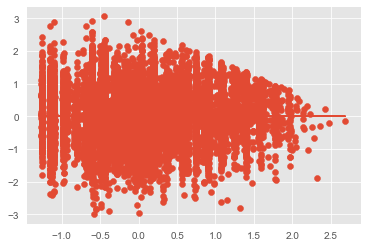

In [17]:
plt.scatter(model.predict(preprocessed[features]), model.resid)
plt.plot(model.predict(preprocessed[features]), [0 for i in range(len(preprocessed))])

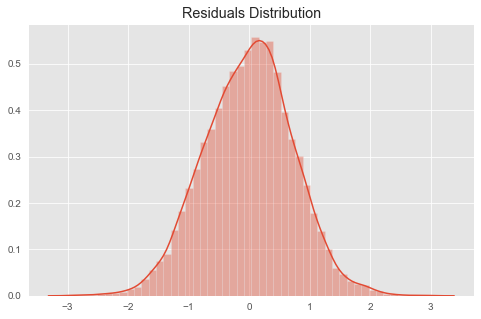

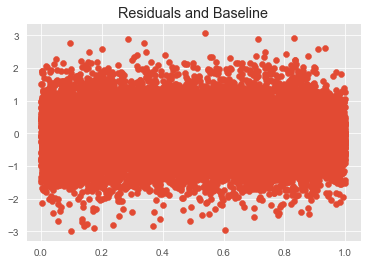

In [18]:
# Plotting residuas to look at distribution
sf.plot_residuals(model)

***
## Checking for Normality

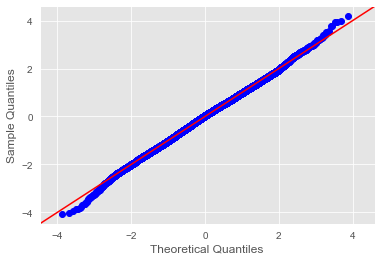

In [19]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)

Wowza! Looks pretty normal to me! However, the models seem to have failed the Shapiro test. I am not sure what to make of this...

***
## Train-Test Split and Cross Validation

### Cross validation

I will use cross validation to run multiple train-test splits to see if r-squared values are varying.

In [20]:
linreg = LinearRegression(fit_intercept=False)
X = preprocessed[features]
y = preprocessed['price_log']
cross_val_score(linreg, X, y, scoring='r2', n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


array([0.45416906, 0.45263766, 0.46077191, 0.4615492 , 0.46746244])

The r-squared values are similar which is good!

### Train-Test Split

In [21]:
# Conduct train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
linreg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [22]:
# Comparing the r-squared values for train and test models
linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.45990775343657697, 0.4707608615753124)

R-squared values of train and test models are very similar so this is good!

In [23]:
# Comparing coef values of OLS models above with coef of splits
linreg.coef_

array([-0.5518723 , -0.66284778, -0.49208959, -0.29929209, -0.12053748,
        0.42473561, -0.00742203,  0.4248064 ,  0.07870585, -0.57082967,
       -0.40643032, -0.1196857 , -0.01926307,  0.62948029,  1.26768724,
        1.97191221,  2.47116339,  2.82360662])